## Necessary Packages

In [1]:
library(lme4)
library(car)
library(effects)
# load data
data <- read.csv("DF_reg_r.csv")
data <- subset(data, previous_response != 'NAN')

data$choice <- ifelse(data$choice == 'Red', 1, 0)
data$resp <- as.factor(data$choice)

data$prev_resp <- ifelse(data$previous_response == 'Red', 1, -1)
data$prev_resp <- as.factor(data$previous_response)

Loading required package: Matrix

Loading required package: carData

Warning message:
"package 'effects' was built under R version 4.3.3"
lattice theme set by effectsTheme()
See ?effectsTheme for details.



## 1st Model

evidence prev_evidence     prev_resp 
     1.002834      1.306408      1.307519

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 | pt_num)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 40942.5  40985.4 -20466.3  40932.5    39063 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.8106 -0.6098 -0.2678  0.6337  4.9356 

Random effects:
 Groups Name        Variance Std.Dev.
 pt_num (Intercept) 0.3397   0.5829  
Number of obs: 39068, groups:  pt_num, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.04337    0.08368  -0.518 0.604276    
evidence       2.04369    0.02228  91.715  < 2e-16 ***
prev_evidence -0.07687    0.02133  -3.604 0.000314 ***
prev_respRed  -0.16546    0.02839  -5.829 5.58e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:


,npar,Sum Sq,Mean Sq,F value
,<int>,<dbl>,<dbl>,<dbl>
evidence,1,8368.65679,8368.65679,8368.65679
prev_evidence,1,53.79970,53.79970,53.79970
prev_resp,1,34.07417,34.07417,34.07417


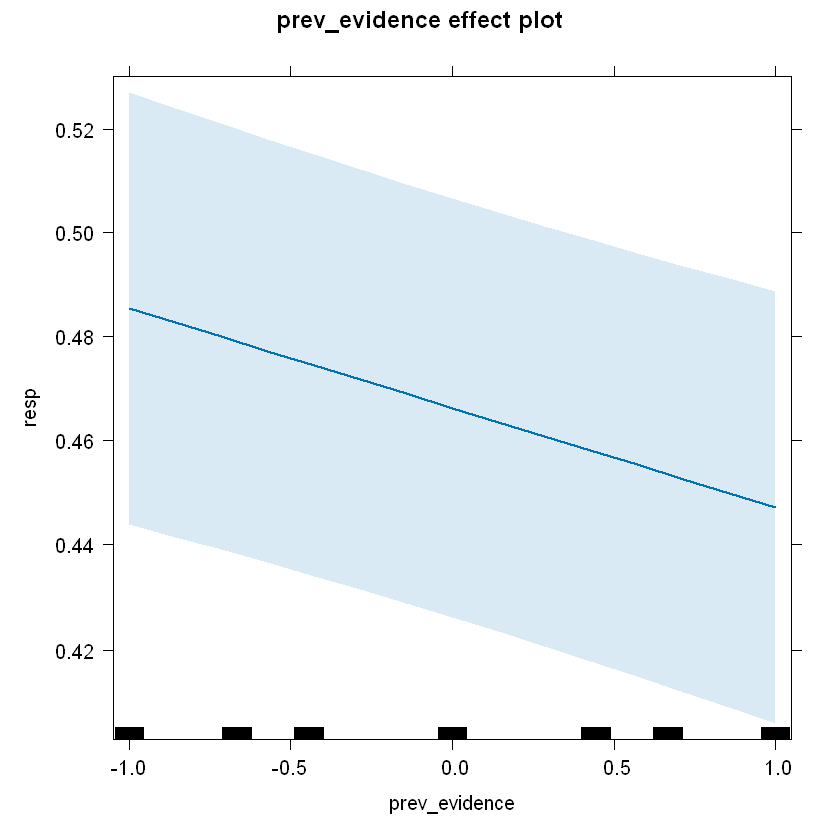

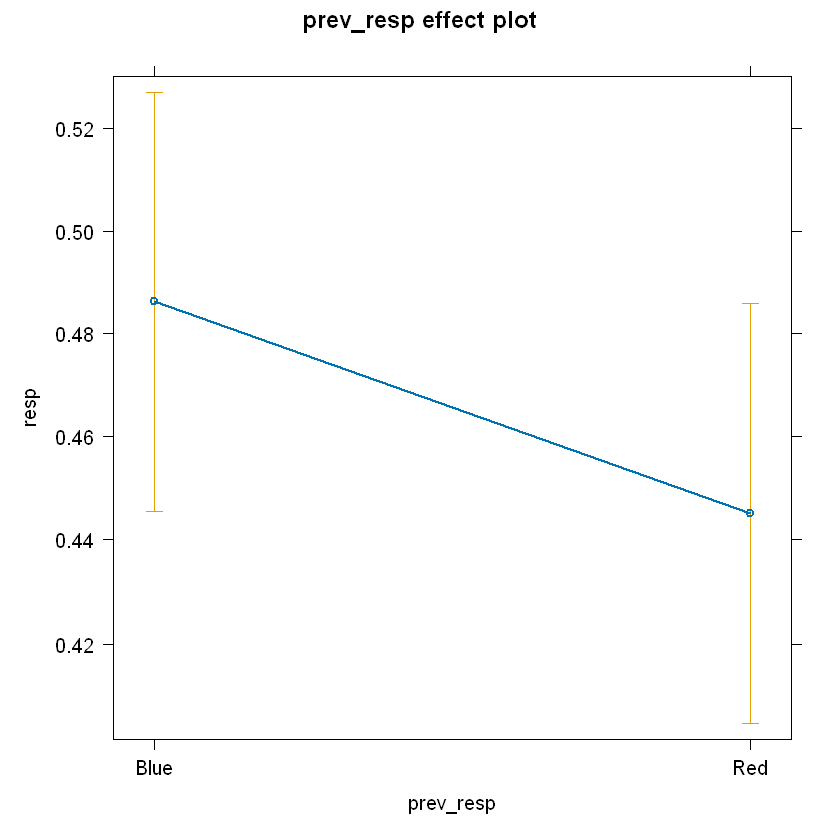

In [2]:
## Model 1 ####
m_AR0 <- glmer(data=data, resp ~ 
                 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1|pt_num),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

vif(m_AR0)
summary(m_AR0)
anova(m_AR0)
plot(effect(c('prev_evidence'), m_AR0)) 
plot(effect(c('prev_resp'), m_AR0)) 

## 2nd Model

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR0,5,40942.52,40985.39,-20466.26,40932.52,NA,NA,NA
m_AR1,7,39964.22,40024.23,-19975.11,39950.22,982.3031,2,4.96124e-214


evidence prev_evidence     prev_resp 
     1.000145      1.273165      1.273222

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence |  
    pt_num)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39964.2  40024.2 -19975.1  39950.2    39061 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5831 -0.6367 -0.1851  0.6386  7.9356 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 pt_num (Intercept) 0.3786   0.6153        
        evidence    0.6144   0.7839   -0.22
Number of obs: 39068, groups:  pt_num, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.06338    0.08821  -0.718 0.472483    
evidence       2.17375    0.11253  19.317  < 2e-16 ***
prev_evidence -0.08274    0.02136  -3.874 0.000107 ***
prev_respRed  -0.17454    0.02841  -6.144 8.04e-10 ***
---
Signif. codes:  0 '**

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,373.16427,1,3.830376e-83
prev_evidence,15.01034,1,1.069239e-04
prev_resp,37.75075,1,8.038583e-10


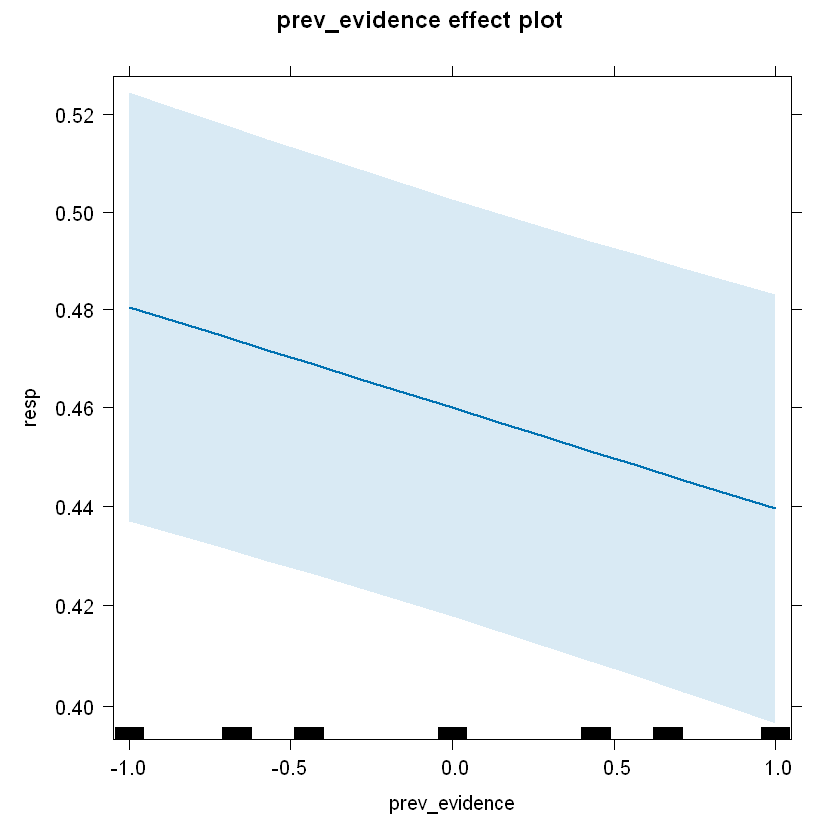

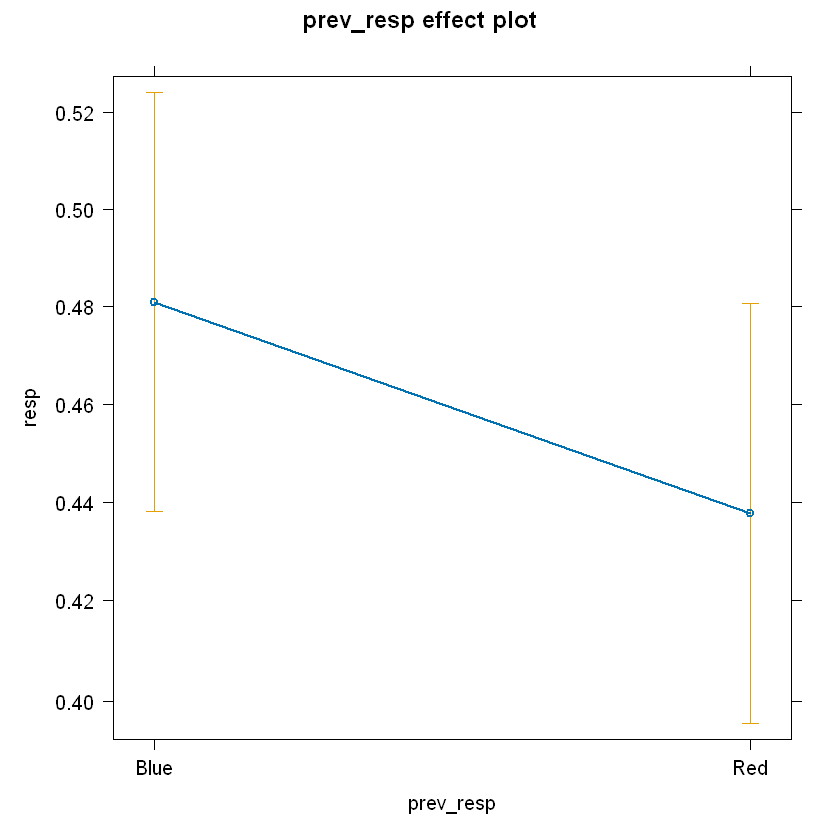

In [3]:
## Model 2 ####
m_AR1 <- glmer(data=data, resp ~ 
                 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1 + evidence|pt_num),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

anova(m_AR0, m_AR1)
vif(m_AR1)
summary(m_AR1)
Anova(m_AR1)
plot(effect(c('prev_evidence'), m_AR1)) 
plot(effect(c('prev_resp'), m_AR1)) 

## 3rd Model

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR1,7,39964.22,40024.23,-19975.11,39950.22,NA,NA,NA
m_AR2,10,39749.43,39835.16,-19864.72,39729.43,220.7876,3,1.356662e-47


evidence prev_evidence     prev_resp 
     1.536270      1.602965      1.068875

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence +  
    prev_evidence | pt_num)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39749.4  39835.2 -19864.7  39729.4    39058 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.1775 -0.6193 -0.1773  0.6307  7.5215 

Random effects:
 Groups Name          Variance Std.Dev. Corr       
 pt_num (Intercept)   0.3808   0.6171              
        evidence      0.6338   0.7961   -0.23      
        prev_evidence 0.1069   0.3270    0.23 -0.65
Number of obs: 39068, groups:  pt_num, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.08910    0.08851  -1.007  0.31410    
evidence       2.19737    0.11423  19.237  < 2e-16 ***
prev_evidence -0.14035    0.05094  -2.755  

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,370.044301,1,1.830410e-82
prev_evidence,7.589987,1,5.869336e-03
prev_resp,19.809107,1,8.557399e-06


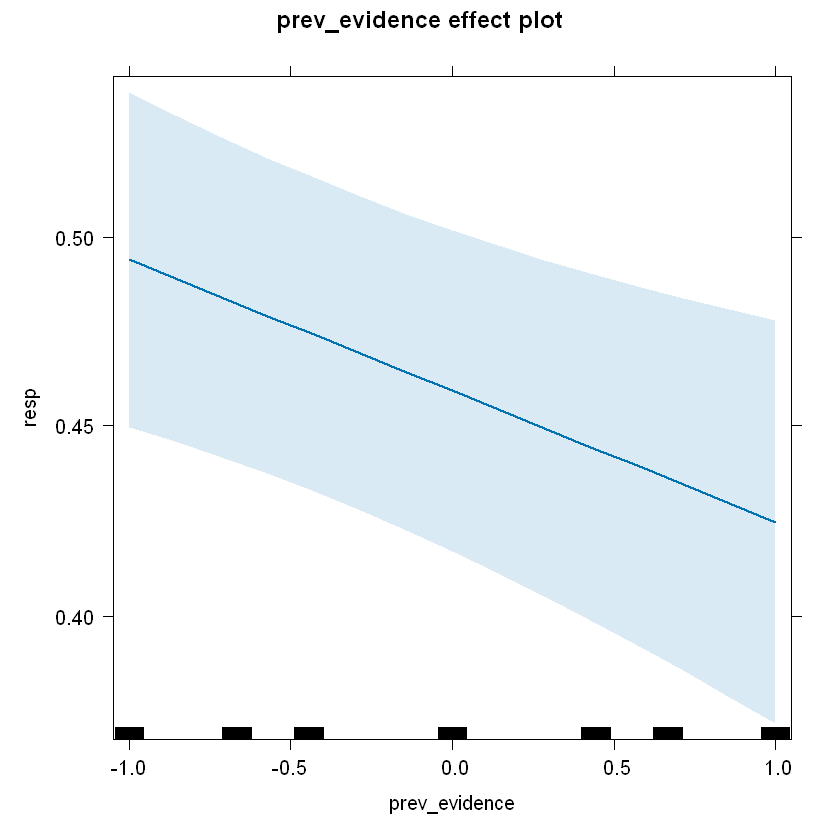

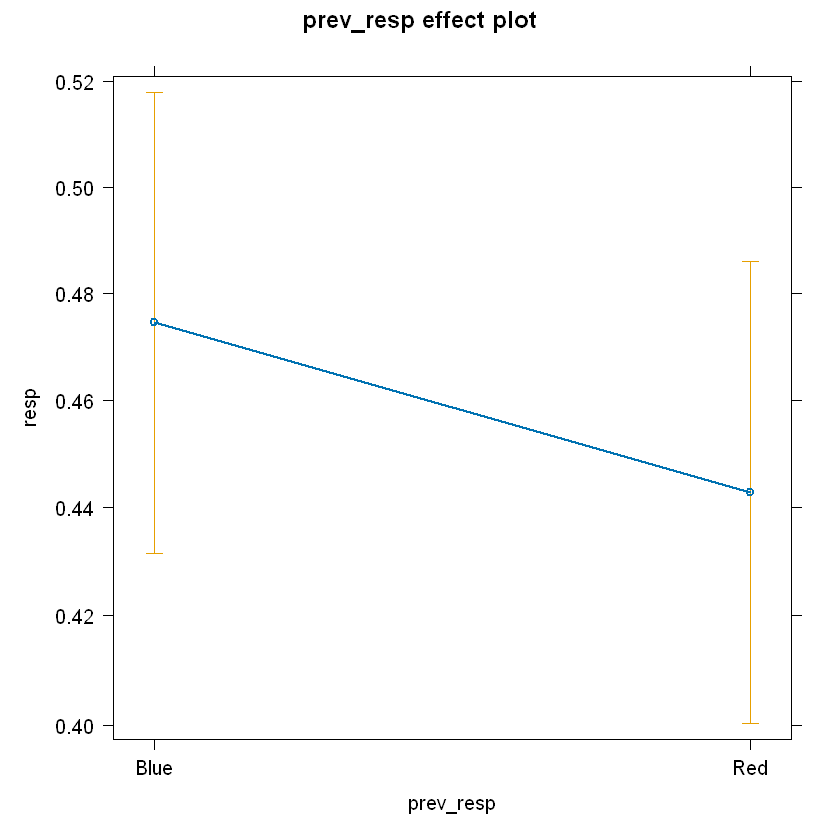

In [16]:
## Model 3 ####

m_AR2 <- glmer(data=data, resp ~ 
                 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1 + evidence + prev_evidence|pt_num),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

anova(m_AR1, m_AR2)
vif(m_AR2)
summary(m_AR2)
Anova(m_AR2)
plot(effect(c('prev_evidence'), m_AR2))
plot(effect(c('prev_resp'), m_AR2))

## 4th Model

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR2,10,39749.43,39835.16,-19864.72,39729.43,NA,NA,NA
m_AR3,14,39563.04,39683.06,-19767.52,39535.04,194.3974,4,6.015187e-41


evidence prev_evidence     prev_resp 
     1.812145      1.868750      1.046712

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence +  
    prev_evidence + prev_resp | pt_num)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39563.0  39683.1 -19767.5  39535.0    39054 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.7371 -0.6150 -0.1717  0.6296  7.4754 

Random effects:
 Groups Name          Variance Std.Dev. Corr             
 pt_num (Intercept)   0.36344  0.6029                    
        evidence      0.64457  0.8028   -0.26            
        prev_evidence 0.09558  0.3092    0.16 -0.76      
        prev_respRed  0.24573  0.4957   -0.16  0.04 -0.10
Number of obs: 39068, groups:  pt_num, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.09421    0.08672  -1.086  0.27729    
evid

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,368.351772,1,4.276284e-82
prev_evidence,8.015777,1,4.637156e-03
prev_resp,3.390936,1,6.555574e-02


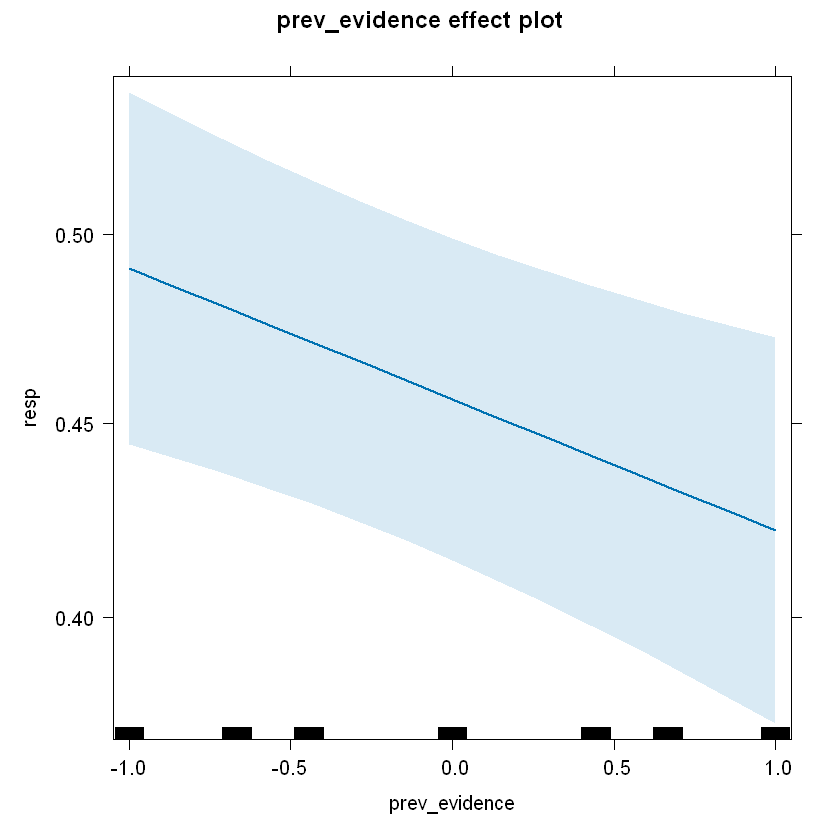

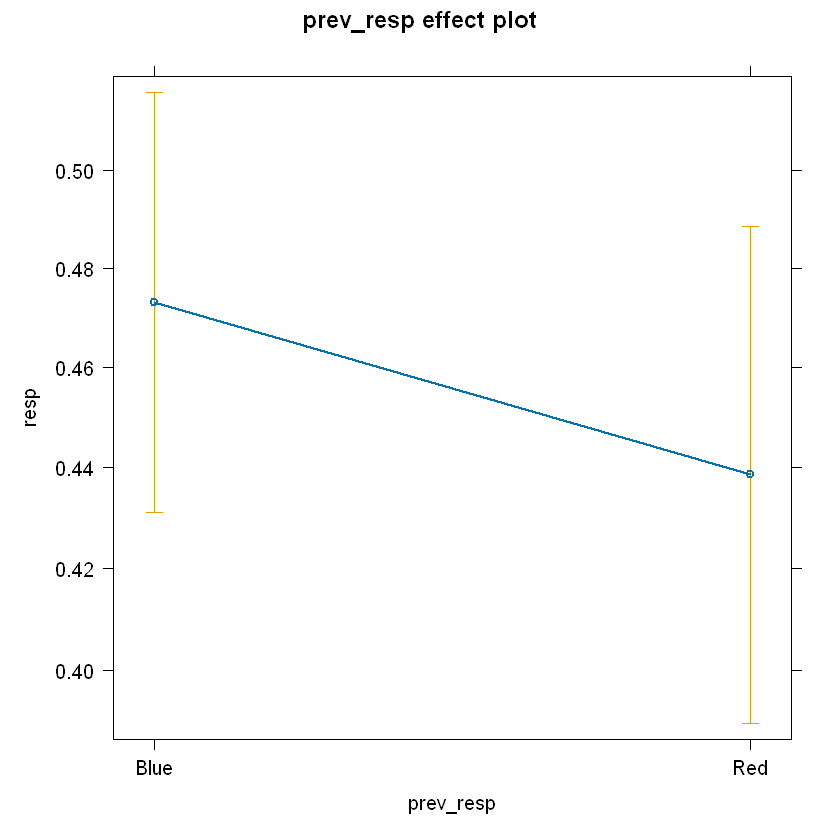

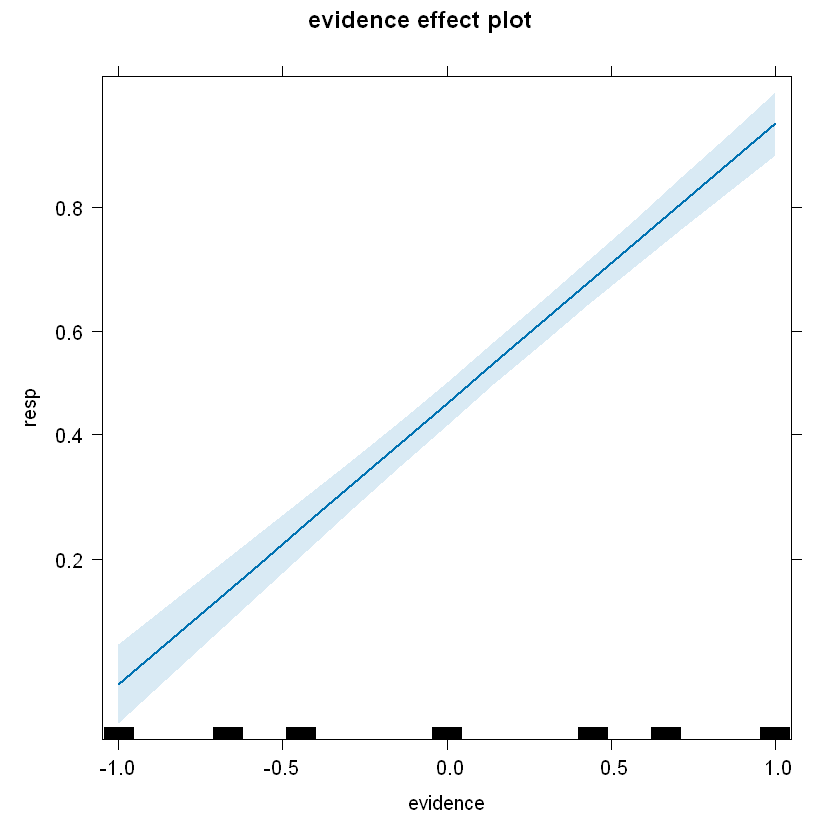

In [5]:
## Model 4 ####

m_AR3 <- glmer(data=data, resp ~ 
                  # nolint
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1 + evidence + prev_evidence + prev_resp|pt_num),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

anova(m_AR2, m_AR3)
vif(m_AR3)
summary(m_AR3)
Anova(m_AR3)
plot(effect(c('prev_evidence'), m_AR3))
plot(effect(c('prev_resp'), m_AR3))
plot(effect(c('evidence'), m_AR3))

In [6]:
summary(m_AR3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence +  
    prev_evidence + prev_resp | pt_num)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39563.0  39683.1 -19767.5  39535.0    39054 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.7371 -0.6150 -0.1717  0.6296  7.4754 

Random effects:
 Groups Name          Variance Std.Dev. Corr             
 pt_num (Intercept)   0.36344  0.6029                    
        evidence      0.64457  0.8028   -0.26            
        prev_evidence 0.09558  0.3092    0.16 -0.76      
        prev_respRed  0.24573  0.4957   -0.16  0.04 -0.10
Number of obs: 39068, groups:  pt_num, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.09421    0.08672  -1.086  0.27729    
evid

In [7]:
Anova(m_AR3)

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,368.351772,1,4.276284e-82
prev_evidence,8.015777,1,4.637156e-03
prev_resp,3.390936,1,6.555574e-02


In [8]:
1/(1+exp(0.094)) - 1/(1+exp(0))

[1] -0.02348271

In [9]:
1/(1+exp(0.094))

[1] 0.4765173

In [10]:
data$resp

[1] 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
   [37] 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0
   [73] 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1
  [109] 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1
  [145] 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
  [181] 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
  [217] 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1
  [253] 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1
  [289] 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1
  [325] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0
  [361] 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0
  [397] 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0
  [433] 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0
  [469] 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
  [505] 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0
  [541] 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0
  [577] 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
  [613] 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1
  [649] 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1
  [685] 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1
  [721] 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1
  [757] 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1
  [793] 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1
  [829] 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
  [865] 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0
  [901] 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0
  [937] 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0
  [973] 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0
 [1009] 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0
 [1045] 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0
 [1081] 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0
 [1117] 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 [1153] 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0
 [1189] 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 [1225] 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1
 [1261] 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 [1297] 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0
 [1333] 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 [1369] 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0
 [1405] 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0
 [1441] 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1
 [1477] 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 [1513] 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 [1549] 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 [1585] 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 [1621] 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 [1657] 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0
 [1693] 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1
 [1729] 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0
 [1765] 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 [18

In [11]:
temp_resp <- mean(as.numeric(data$resp) - 1)
temp_resp

[1] 0.4784399

In [12]:
data$approx_prev_conf <- abs(data$prev_evidence)


m_AR4 <- glmer(data=data, resp ~ 
                  # nolint
                 evidence +
                 prev_evidence + 
                 prev_resp * approx_prev_conf +
                 (1|pt_num),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))


evidence              prev_evidence 
                  1.003444                   1.593242 
                 prev_resp           approx_prev_conf 
                  3.194857                   2.133407 
prev_resp:approx_prev_conf 
                  5.066086

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp * approx_prev_conf +  
    (1 | pt_num)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 40925.9  40986.0 -20456.0  40911.9    39061 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.1515 -0.6107 -0.2663  0.6350  4.9598 

Random effects:
 Groups Name        Variance Std.Dev.
 pt_num (Intercept) 0.3402   0.5833  
Number of obs: 39068, groups:  pt_num, 51

Fixed effects:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -0.10327    0.08714  -1.185  0.23600    
evidence                       2.04488    0.02230  91.718  < 2e-16 ***
prev_evidence                 -0.03203    0.02356  -1.359  0.17406    
prev_respRed                  -0.01206    0.04439  -0.272  0.785

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,8412.1567904,1,0.000000e+00
prev_evidence,1.8476305,1,1.740592e-01
prev_resp,33.8015694,1,6.102961e-09
approx_prev_conf,0.5069322,1,4.764699e-01
prev_resp:approx_prev_conf,20.0964625,1,7.363274e-06


NOTE: prev_resp is not a high-order term in the model



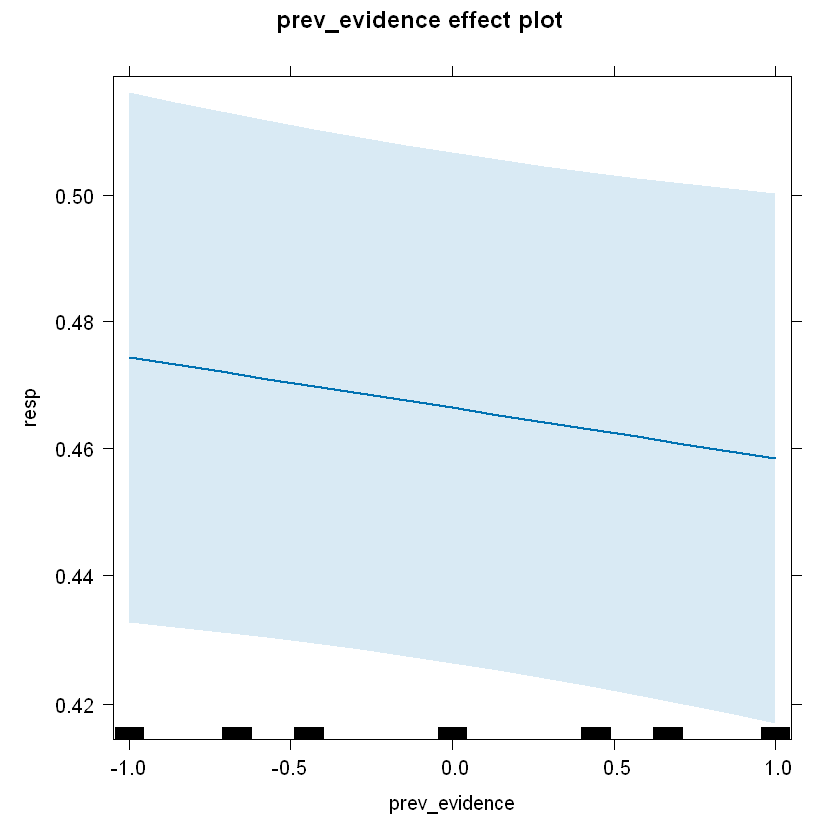

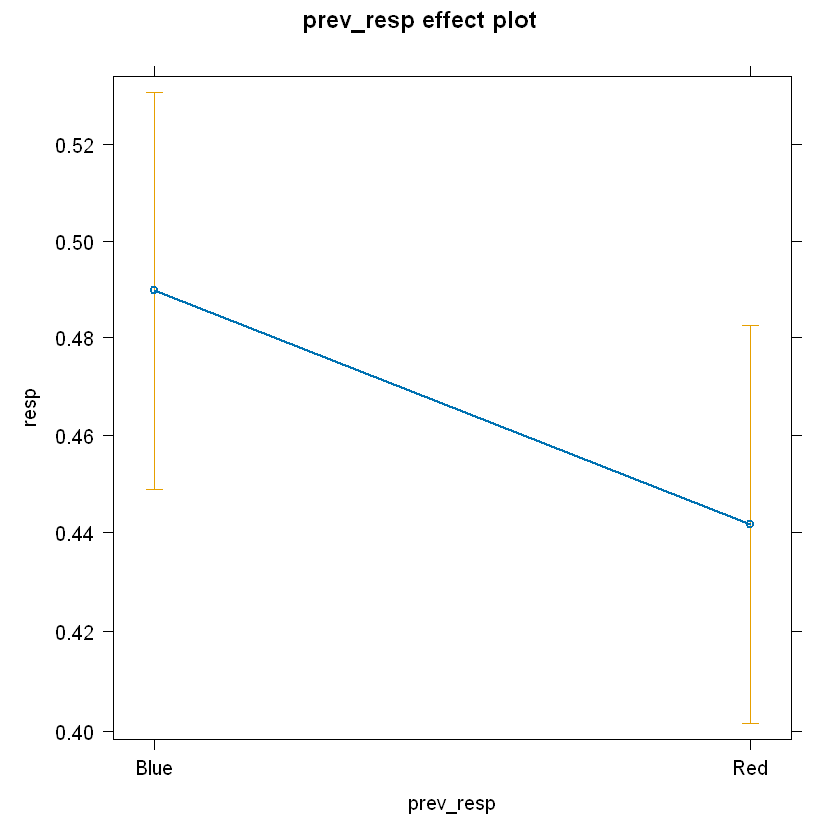

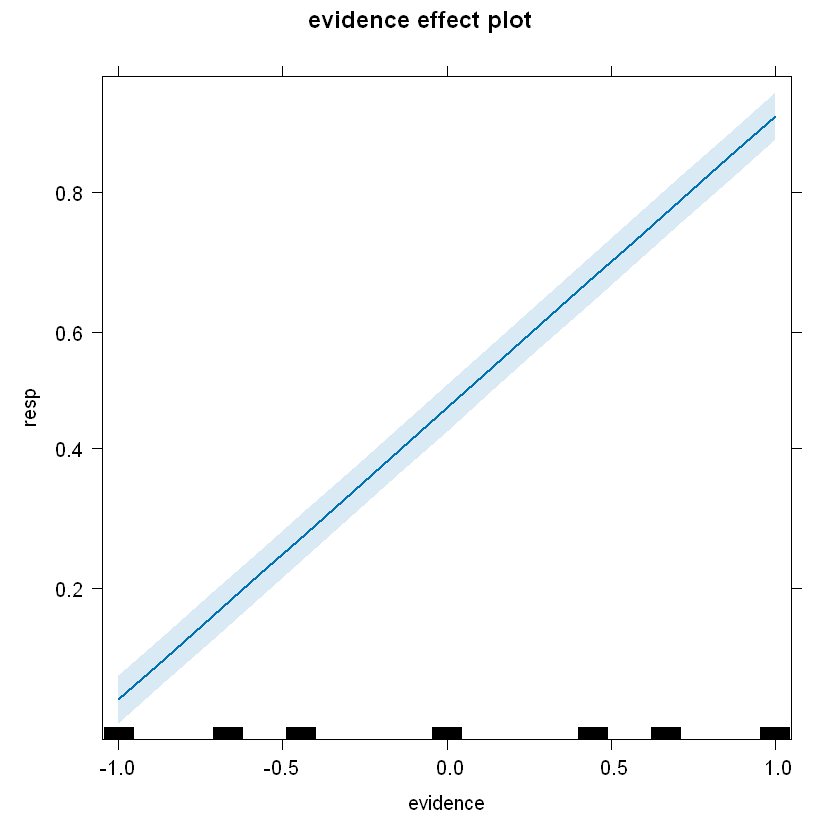

In [13]:
vif(m_AR4)
summary(m_AR4)
Anova(m_AR4)
plot(effect(c('prev_evidence'), m_AR4))
plot(effect(c('prev_resp'), m_AR4))
plot(effect(c('evidence'), m_AR4))

In [14]:
anova(m_AR0, m_AR1, m_AR2, m_AR3)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR0,5,40942.52,40985.39,-20466.26,40932.52,NA,NA,NA
m_AR1,7,39964.22,40024.23,-19975.11,39950.22,982.3031,2,4.961240e-214
m_AR2,10,39749.43,39835.16,-19864.72,39729.43,220.7876,3,1.356662e-47
m_AR3,14,39563.04,39683.06,-19767.52,39535.04,194.3974,4,6.015187e-41


In [15]:
anova(m_AR2, m_AR3)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR2,10,39749.43,39835.16,-19864.72,39729.43,NA,NA,NA
m_AR3,14,39563.04,39683.06,-19767.52,39535.04,194.3974,4,6.015187e-41
